In [8]:
from ultralytics import YOLO
import pandas as pd
import os
import numpy as np

model = YOLO("yolov8n-pose.pt")

labels_df = pd.read_csv("manual_labels.csv")
all_keypoints = []

frames_dir = "fairplay_frames"

for _, row in labels_df.iterrows():
    image_path = os.path.join(frames_dir, row["frame"])
    if not os.path.exists(image_path):
        print("Missing file:", row["frame"])
        continue

    result = model(image_path)
    keypoints = result[0].keypoints

    if keypoints is None:
        print("No keypoints detected for:", row["frame"])
        continue

    coords = keypoints.xy.numpy()[0]
    flattened = coords.flatten().tolist()
    flattened.append(row["is_fairplay"])
    all_keypoints.append(flattened)

column_names = [f"{i}_{axis}" for i in range(17) for axis in ["x", "y"]] + ["label"]
output_df = pd.DataFrame(all_keypoints, columns=column_names)
output_df.to_csv("pose_dataset.csv", index=False)

print("Keypoints saved to pose_dataset.csv")



image 1/1 C:\Users\HP\EITP Project\fairplay_frames\handshake1.jpg: 384x640 2 persons, 180.8ms
Speed: 12.1ms preprocess, 180.8ms inference, 10.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\HP\EITP Project\fairplay_frames\handshake2.jpg: 352x640 4 persons, 90.2ms
Speed: 2.8ms preprocess, 90.2ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 C:\Users\HP\EITP Project\fairplay_frames\handshake3.jpg: 448x640 2 persons, 97.6ms
Speed: 3.7ms preprocess, 97.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\HP\EITP Project\fairplay_frames\handshake4.jpg: 448x640 3 persons, 89.9ms
Speed: 4.3ms preprocess, 89.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\HP\EITP Project\fairplay_frames\handshake5.jpg: 384x640 2 persons, 87.3ms
Speed: 2.9ms preprocess, 87.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\HP\EITP Project\fairp


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.84      0.89      0.86        18

    accuracy                           0.81        26
   macro avg       0.78      0.76      0.77        26
weighted avg       0.80      0.81      0.80        26


🧾 Confusion Matrix:


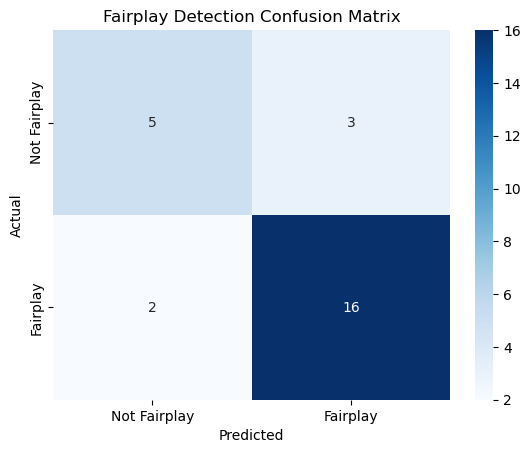

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("pose_dataset.csv")

X = df.drop(columns=["label"])
y = df["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Fairplay", "Fairplay"],
            yticklabels=["Not Fairplay", "Fairplay"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
